In [1]:
import tensorflow as tf

<function matplotlib.pyplot.show(close=None, block=None)>

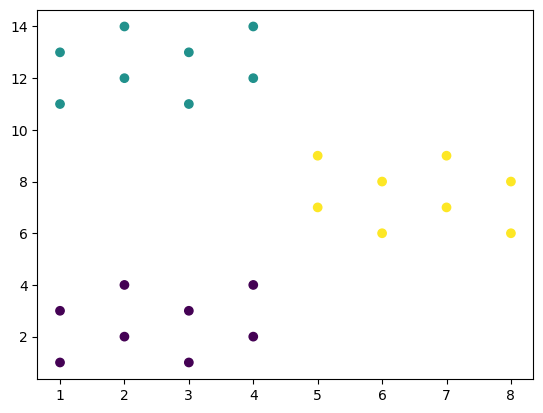

In [2]:
import numpy as np
import matplotlib.pyplot as plt

train_x = [[1,1],[1,3],[2,2],[2,4],[3,1],[3,3],[4,2],[4,4],
           [1,11],[1,13],[2,12],[2,14],[3,11],[3,13],[4,12],[4,14],
           [5,7],[5,9],[6,6],[6,8],[7,7],[7,9],[8,6],[8,8]]
train_y = [[0],[0],[0],[0],[0],[0],[0],[0],
           [1],[1],[1],[1],[1],[1],[1],[1],
           [2],[2],[2],[2],[2],[2],[2],[2]]

train_x = np.array(train_x, dtype=np.float32)
train_y = np.array(train_y, dtype=np.float32)

plt.scatter(train_x[: ,0:1], train_x[: ,1:2], c=train_y)
plt.show

In [3]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)

In [7]:
class softmaxWithTF():
    def __init__(self):
        self.epochs = 1000
        self.learning_rate = 0.015
        self.w = tf.Variable(tf.random.normal(shape=[2,3], dtype=tf.float32))
        self.b = tf.Variable(tf.random.normal(shape=[1,3], dtype=tf.float32))

    def train_on_batch(self, x, y):
        with tf.GradientTape() as tape:
            logit = tf.matmul(x, self.w) + self.b
            hypothesis = tf.nn.softmax(logit)
            loss = -tf.reduce_mean(tf.reduce_sum(y*tf.math.log(hypothesis), 1))

        loss_dw, loss_db = tape.gradient(loss, [self.w, self.b])

        self.w.assign_sub(self.learning_rate * loss_dw)
        self.b.assign_sub(self.learning_rate * loss_db)

        return loss

    def fitModel(self, x, y):
        dataset = tf.data.Dataset.from_tensor_slices((x,y))
        dataset = dataset.shuffle(buffer_size=24).batch(8)

        loss_mem = []

        for e in range(self.epochs):
            for step, (x,y) in enumerate(dataset):
                loss = self.train_on_batch(x,y)
            loss_mem.append(loss)
        return loss_mem

    def predictModel(self, x):
        logit = tf.matmul(x, self.w) + self.b
        hypothesis = tf.nn.softmax(logit)
        return tf.argmax(hypothesis, 1)

In [10]:
train_y = np.array(train_y, dtype=np.float64)

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


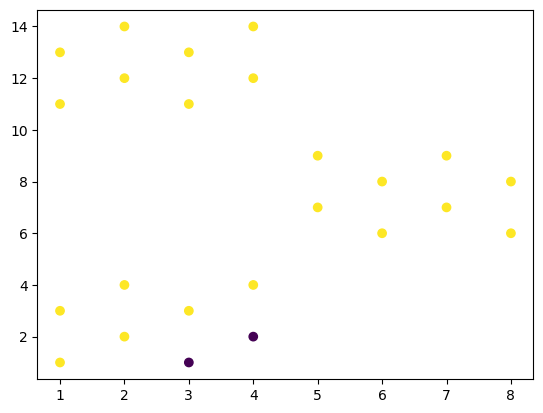

In [11]:
model = softmaxWithTF()
res_y = model.predictModel(train_x)

print(res_y.numpy())

res_y = np.expand_dims(res_y.numpy(), axis=1)

plt.scatter(train_x[:,0:1], train_x[:,1:2], c=res_y)
plt.show()